# Movie Recommender
<a id='Movie_Recommender'></a> 

## Table of Contents<a id='Table_of_Contents'></a>
* [1 Movie Recommender](#1_Movie_Recommender)
    * [1.1 Table of Contents](#1.1_Table_of_Contents)
    * [1.2 Introduction](#1.2_Introduction)
    * [1.3 Imports](#1.3_Imports)
    * [1.4 Load Data](#1.4_Load_Data)
    * [1.5 Clean Data](#1.5_Clean_Data)
    * [1.6 Merge Datasets](#1.6_Merge_Datasets)
    * [1.7 Content-Based Filtering](#1.7_Content_Based_Filtering)
    * [1.8 Recommender using Correlation](#1.8_Recommender_using_Correlation)
    * [1.9 Hybrid Technique: Scaled Weighted Average and Scaled Popularity score based Recommender](#1.9_Hybrid_Technique_Scaled_Weighted_Average_and_Scaled_Popularity_score_based_Recommender)
    * [1.10 Simple Collaborative Filtering using Nearest Neighbor](#1.10_Simple_Collaborative_Filtering_using_Nearest_Neighbor)

## Introduction<a id='1.2_Introduction'></a>

Does the recommended section provide satisfaction? Are the movie suggestions popping up elevate anyone’s mood? Do the advertisements appearing in between Instagram posts catch anybody’s attention? Is there a system that gives better movie suggestions? 

From the moment an individual unlocks his/her phone till the moment he/she puts it away, every action being committed is tracked and monitored, stored into data, that is confidential information sold to big corporations. Pew Research states that 81% of Americans own smartphones creating a push for relevant and accurate promotions that will influence a user’s decision-making process and attract customers. With complex supervision, people with smartphones are being schemed to stay on their cellular devices for longer periods of time to generate more revenue. Why? Companies with money can afford exceptional marketing. According to Business Wire, 60% of consumers click on cellphone ads every week suggesting how prevalent mobile advertising has become. Given these points, everyone is simply surrounded by recommender systems; people are constantly getting pitched ideas. From a simple Google search to a YouTube video to a Netflix original and to a song on Spotify, there exists a machine that advises its user based off of abundant data. 

**Recommender systems are everywhere.    
-video streaming platforms(youtube, netflix, hulu)  
-audio streaming platforms(spotify,apple, pandora)  
-shopping(amazon,ebay,bestbuy)  
-dating apps(tinder, okCupid, bumble)  
-news(medium, la times)**

## Imports<a id='1.3_Imports'></a>

In [1]:
#import modules and their subpackages required for analysis
import ast
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
from ast import literal_eval
import seaborn as sns 
sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")

## Load Data<a id='1.4_Load_Data'></a>

In [2]:
#load data into variable
movies = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/TMDB-Movie-Ratings/rawdata/movies_metadata.csv', index_col = 'title', low_memory = False, nrows = 46000)
credits = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/TMDB-Movie-Ratings/rawdata/credits.csv')
keywords = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/TMDB-Movie-Ratings/rawdata/keywords.csv')
ratings = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/TMDB-Movie-Ratings/data/ratings_cleaned.csv')

## Clean Data<a id='1.5_Clean_Data'></a>

In [3]:
def clean_col(df,col):
    """ 
    @ params: dataframe, column
    removes irrelevant information and outputs only list of the names in each dictionary
    """
    df[col] = df[col].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])

In [4]:
cols = ['genres', 'production_countries', 'spoken_languages', 'belongs_to_collection']
for col in cols:
    clean_col(movies, col)

In [5]:
movies[movies.vote_count.isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
NaN,FALSE,[],0,"[Action, Thriller, Drama]",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,[],NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
NaN,- Written by Ørnås,[],/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",8/20/1997,0,104,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],1,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
NaN,FALSE,[],0,"[Animation, Science Fiction]",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,[],NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
NaN,Rune Balot goes to a casino connected to the ...,[],/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/29/2012,0,68,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,[],12,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
NaN,FALSE,[],0,"[TV Movie, Action, Horror, Science Fiction]",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,[],NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
NaN,Avalanche Sharks tells the story of a bikini ...,[],/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1/1/2014,0,82,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],22,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN


In [6]:
movies = movies[~movies.vote_count.isnull()]

In [7]:
movies = movies.drop_duplicates(subset=['original_title', 'release_date'])

In [8]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')

In [9]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [10]:
clean_col(credits, 'cast')
clean_col(credits, 'crew')
clean_col(keywords, 'keywords')

In [11]:
credits.id = credits.id.astype(int)
movies['id'] = movies['id'].astype(int)
keywords['id'] = keywords.id.astype(int)

## Merge Datasets<a id='1.6_Merge_Datasets'></a>

In [12]:
movies = movies.merge(credits, on = 'id')
movies = movies.merge(keywords, on='id')

In [13]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,cast,crew,keywords
0,FALSE,[],30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,[English],Released,NaN,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...","[jealousy, toy, boy, friendship, friends, riva..."
1,FALSE,[],65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...","[board game, disappearance, based on children'..."
2,FALSE,[],0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...","[fishing, best friend, duringcreditsstinger, o..."
3,FALSE,[],16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,[English],Released,Friends are the people who let you be yourself...,False,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...","[based on novel, interracial relationship, sin..."
4,FALSE,[],0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...","[baby, midlife crisis, confidence, aging, daug..."


In [14]:
movies.overview = movies.overview.fillna(" ")
movies.tagline = movies.tagline.fillna(" ")

Reducing the dataset by removing irrelevant information

In [15]:
movies = movies.drop(columns= ['homepage', 'poster_path', 'belongs_to_collection', 'video'])

## Content Based Filtering<a id='1.7_Content_Based_Filtering'></a>

Had to only work with a fraction of the dataset because lack of computing power.

In [16]:
movies['details'] = movies.overview + movies.tagline

small_movies = movies.sample(frac = 0.01, axis =0)

small_movies.details = small_movies.details.fillna(" ")
small_movies.details = ','.join(map(str, small_movies.details)) 
small_movies.cast = small_movies.cast.apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
small_movies.cast = ','.join(map(str, small_movies.cast)) 
small_movies.keywords = small_movies.keywords.apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
small_movies.keywords = ','.join(map(str, small_movies.keywords))  
small_movies.genres =','.join(map(str, small_movies.genres))  

#small_movies.cast = small_movies.cast.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#small_movies.keywords=small_movies.keywords.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#small_movies.genres=small_movies.genres.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
small_movies.cast = small_movies.cast.apply(lambda x: x[:3] if len (x) >= 3 else x)

small_movies['mix'] = small_movies.details + small_movies.keywords + small_movies.cast + small_movies.genres
#small_movies['mix'] = small_movies.mix.apply(lambda x: " ".join(x))

In [17]:
small_movies.applymap(lambda x: isinstance(x,list)).all()

adult                   False
budget                  False
genres                  False
id                      False
imdb_id                 False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries     True
release_date            False
revenue                 False
runtime                 False
spoken_languages         True
status                  False
tagline                 False
vote_average            False
vote_count              False
cast                    False
crew                     True
keywords                False
details                 False
mix                     False
dtype: bool

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0,stop_words = 'english')
tfidf_matrix = vectorizer.fit_transform(small_movies.mix)  ## Even astype(str) would work
print(tfidf_matrix.toarray())

[[0.00572174 0.00190725 0.00190725 ... 0.00190725 0.00190725 0.00190725]
 [0.00572174 0.00190725 0.00190725 ... 0.00190725 0.00190725 0.00190725]
 [0.00572174 0.00190725 0.00190725 ... 0.00190725 0.00190725 0.00190725]
 ...
 [0.00572174 0.00190725 0.00190725 ... 0.00190725 0.00190725 0.00190725]
 [0.00572174 0.00190725 0.00190725 ... 0.00190725 0.00190725 0.00190725]
 [0.00572174 0.00190725 0.00190725 ... 0.00190725 0.00190725 0.00190725]]


In [19]:
from sklearn.metrics.pairwise import linear_kernel
# cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [20]:
## recommender function
# Generate mapping between titles and index
indices = pd.Series(movies.index, index=movies['original_title']).drop_duplicates()

def get_recs(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 20 most similar movies
    sim_scores = sim_scores[1:20]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 20 most similar movies
    return movies['original_title'].iloc[movie_indices]

In [21]:
print(get_recs('Toy Story',cosine_sim, indices))

1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
5                               Heat
6                            Sabrina
7                       Tom and Huck
8                       Sudden Death
9                          GoldenEye
10            The American President
11       Dracula: Dead and Loving It
12                             Balto
13                             Nixon
14                  Cutthroat Island
15                            Casino
16             Sense and Sensibility
17                        Four Rooms
18    Ace Ventura: When Nature Calls
19                       Money Train
Name: original_title, dtype: object


## Recommender using Correlation<a id='1.8_Recommender_using_Correlation'></a>

In [22]:
ratings = pd.merge(movies, ratings,on = 'id' , how = 'left')

In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185050 entries, 0 to 1185049
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   adult                 1185050 non-null  object        
 1   budget                1185050 non-null  object        
 2   genres                1185050 non-null  object        
 3   id                    1185050 non-null  int32         
 4   imdb_id               1185024 non-null  object        
 5   original_language     1185037 non-null  object        
 6   original_title        1185050 non-null  object        
 7   overview              1185050 non-null  object        
 8   popularity            1185050 non-null  object        
 9   production_companies  1185050 non-null  object        
 10  production_countries  1185050 non-null  object        
 11  release_date          1184248 non-null  datetime64[ns]
 12  revenue               1185050 non-null  fl

In [24]:
ratings.isnull().sum()

adult                       0
budget                      0
genres                      0
id                          0
imdb_id                    26
original_language          13
original_title              0
overview                    0
popularity                  0
production_companies        0
production_countries        0
release_date              802
revenue                     0
runtime                   346
spoken_languages            0
status                    151
tagline                     0
vote_average                0
vote_count                  0
cast                        0
crew                        0
keywords                    0
details                     0
userId                  40632
rating                  40632
timestamp               40632
dtype: int64

In [25]:
ratings[ratings.rating.isnull()]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,tagline,vote_average,vote_count,cast,crew,keywords,details,userId,rating,timestamp
45,FALSE,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...","[fishing, best friend, duringcreditsstinger, o...",A family wedding reignites the ancient feud be...,NaN,NaN,NaN
46,FALSE,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,...,Friends are the people who let you be yourself...,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...","[based on novel, interracial relationship, sin...","Cheated on, mistreated and stepped on, the wom...",NaN,NaN,NaN
47,FALSE,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,Just When His World Is Back To Normal... He's ...,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...","[baby, midlife crisis, confidence, aging, daug...",Just when George Banks has recovered from his ...,NaN,NaN,NaN
269,FALSE,58000000,"[Comedy, Romance]",11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,You are cordially invited to the most surprisi...,6.2,141.0,"[Harrison Ford, Julia Ormond, Greg Kinnear, An...","[Sydney Pollack, Barbara Benedek, Sydney Polla...","[paris, brother brother relationship, chauffeu...",An ugly duckling having undergone a remarkable...,NaN,NaN,NaN
270,FALSE,0,"[Action, Adventure, Drama, Family]",45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,The Original Bad Boys.,5.4,45.0,"[Jonathan Taylor Thomas, Brad Renfro, Rachael ...","[David Loughery, Stephen Sommers, Peter Hewitt...",[],"A mischievous young boy, Tom Sawyer, witnesses...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185044,FALSE,0,"[Drama, Action, Romance]",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...",...,,5.7,26.0,"[Patrick Bergin, Uma Thurman, David Morrissey,...","[John Irvin, Sam Resnick, John McGrath, Sam Re...",[],"Yet another version of the classic epic, with ...",NaN,NaN,NaN
1185045,FALSE,0,"[Drama, Family]",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],...,Rising and falling between a man and woman,4.0,1.0,"[Leila Hatami, Kourosh Tahami, Elham Korda]","[Hamid Nematollah, Hamid Nematollah, Farshad M...",[tragic love],Rising and falling between a man and woman.Ris...,NaN,NaN,NaN
1185047,FALSE,0,"[Action, Drama, Thriller]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",...,A deadly game of wits.,3.8,6.0,"[Erika Eleniak, Adam Baldwin, Julie du Page, J...","[Mark L. Lester, C. Courtney Joyner, Jeffrey G...",[],"When one of her hits goes wrong, a professiona...",NaN,NaN,NaN
1185048,FALSE,0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",...,,0.0,0.0,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...","[Yakov Protazanov, Joseph N. Ermolieff]",[],"In a small town live two brothers, one a minis...",NaN,NaN,NaN


Searching for the best movies using average rating and number of ratings. 

In [26]:
reviews = pd.DataFrame(ratings.groupby('original_title')['rating'].mean())

In [27]:
reviews['num_ratings'] = pd.DataFrame(ratings.groupby('original_title')['rating'].count())

few visualizations to better illustrate the dataset. 

<AxesSubplot:>

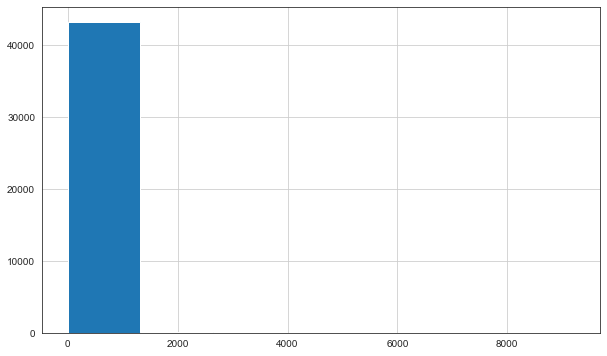

In [28]:
plt.figure(figsize= (10,6))
reviews['num_ratings'].hist(bins=7)

<AxesSubplot:>

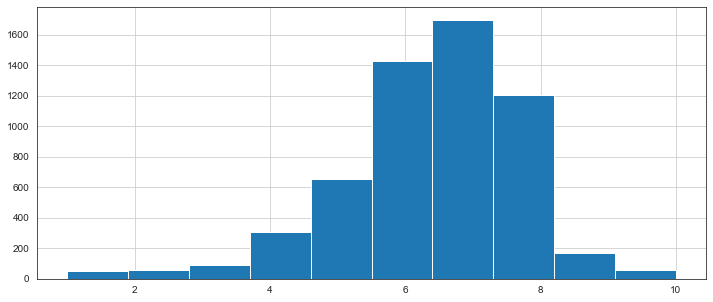

In [29]:
plt.figure(figsize=(12,5))
reviews['rating'].hist(bins=10)

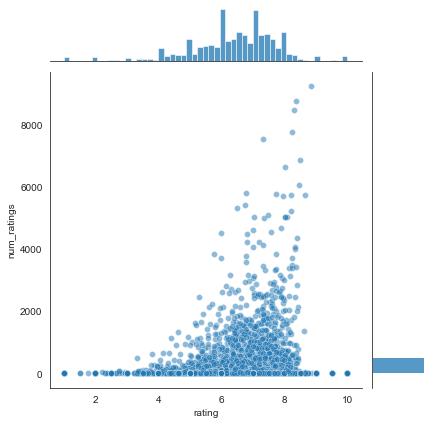

In [30]:
sns.jointplot(x='rating', y='num_ratings', data=reviews, alpha = 0.5)

It is simpler to create a matrix where user Ids are on one axis and movie titles are on another when exploring similar movies. Each record signifies the rating given by the user for each film and null values mean that the person has yet to watch the film.

In [31]:
movie_mat=ratings.pivot_table(index='userId', columns='original_title', values='rating')
movie_mat.head(10)

original_title,!Women Art Revolution,$5 a Day,'Gator Bait,'R Xmas,'Twas the Night Before Christmas,(A)Sexual,...And the Pursuit of Happiness,...Più forte ragazzi!,...altrimenti ci arrabbiamo!,00 Schneider - Jagd auf Nihil Baxter,...,최종병기 활,춘향뎐,친절한 금자씨,파란대문,해안선,헬로우 고스트,형사 Duelist,활,회사원,２０世紀少年< 第1章> 終わりの始まり
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
reviews.sort_values('num_ratings', ascending=False).head(10)

,rating,num_ratings
original_title,,
The Million Dollar Hotel,8.833604,9231
Terminator 3: Rise of the Machines,8.370379,8764
Солярис,8.298545,8451
The 39 Steps,8.243449,7747
Monsoon Wedding,7.305544,7521
Once Were Warriors,8.508099,6853
Trois couleurs : Rouge,8.023949,6639
License to Wed,8.448151,6056
La passion de Jeanne d'Arc,6.774511,5783


In [33]:
reviews.head()

,rating,num_ratings
original_title,,
!Women Art Revolution,6.119565,92
#1 Cheerleader Camp,NaN,0
#Horror,NaN,0
#Pellichoopulu,NaN,0
#SELFIEPARTY,NaN,0


In [34]:
Jumanji_user_ratings = movie_mat['Jumanji']
Terminator_user_ratings = movie_mat['Terminator Salvation']
Jumanji_user_ratings.head()

userId
1.0   NaN
2.0   NaN
3.0   NaN
4.0   NaN
5.0   NaN
Name: Jumanji, dtype: float64

Using corrwith(), correlating two films together to observe the relationship 

In [35]:
corr_Jumanji = movie_mat.corrwith(Jumanji_user_ratings)
corr_Terminator = movie_mat.corrwith(Terminator_user_ratings)
corr_Jumanji.head()

original_title
!Women Art Revolution              NaN
$5 a Day                           NaN
'Gator Bait                        NaN
'R Xmas                            NaN
'Twas the Night Before Christmas   NaN
dtype: float64

In [36]:
corr_Jumanji= pd.DataFrame(corr_Jumanji, columns=['Correlation'])
corr_Jumanji.dropna(inplace=True)
corr_Jumanji.head()

,Correlation
original_title,
...Più forte ragazzi!,0.404520
10 Items or Less,-0.333333
13 Tzameti,1.000000
"20,000 Leagues Under the Sea",-0.497310
28 Weeks Later,-0.333333


This perfect correlation shouldn't be completely trusted because some of these films barely have any votes, so it doesn't make sense. To counter with this issue, filter out using number of ratings. 

In [37]:
corr_Jumanji.sort_values('Correlation', ascending=False).head(10)

,Correlation
original_title,
Imagination,1.0
"Mother, Jugs & Speed",1.0
Hero,1.0
Hors-la-loi,1.0
The Man Who Knew Too Much,1.0
In the Blood,1.0
Jumanji,1.0
Juste une question d'amour,1.0
Les émotifs anonymes,1.0


In [38]:
corr_Jumanji=corr_Jumanji.join(reviews['num_ratings'])

Basing of correlation, if one were to watch Jumanji, he/she should also watch films such 'EVA', 'Shiloh', and 'Saving Grace'. 

In [39]:
corr_Jumanji[corr_Jumanji['num_ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num_ratings
original_title,,
EVA,1.0,1062
Shiloh,1.0,578
Saving Grace,1.0,263
Du rififi chez les hommes,1.0,483
Juste une question d'amour,1.0,972


Basing of correlation, if one were to watch Terminator, he/she would also enjoy films such as 'Lord of Illusions', 'Bridesmaids', and 'Brubaker'.

In [40]:
corr_Terminator=pd.DataFrame(corr_Terminator, columns=['Correlation'])
corr_Terminator.dropna(inplace=True)
corr_Terminator=corr_Terminator.join(reviews['num_ratings'])
corr_Terminator[corr_Terminator['num_ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num_ratings
original_title,,
Judex,1.0,202
La fonte des neiges,1.0,127
Lord of Illusions,1.0,181
Brubaker,1.0,106
Bridesmaids,1.0,173


## Hybrid Technique: Scaled Weighted Average and Scaled Popularity score based Recommender<a id='1.9_Hybrid_Technique_\:_Scaled_Weighted_Average_and_Scaled_Popularity_score_based_Recommender'></a>

Working with the TMDB dataset, now will use IMDB's weighted rating formula to construct a hybrid recommender technique. The mathematical formula is represented as follows:  
Weighted Rating (WR) =  
\begin{equation}
(\frac{v}{v+m} * R) + (\frac{m}{v+m} * C)
\end{equation}    
where,   
- v: number of votes for each film   
- m: minimum number of votes  
- R: the average rating of a fimn  
- C: the mean vote throughout the dataset    
Using the **90th percentile** as a cutoff for m, calculating top movies with an addition of a metric  
source: https://www.quora.com/How-does-IMDbs-rating-system-work  

This is how IMDB ranks their top 250 films. Since the dataset currently being explored is massive, this is just another method to help filter out unworthy films and build a basic recommender system. 

In [41]:
v = movies['vote_count']
m = movies['vote_count'].quantile(0.90)
R=movies['vote_average']
C=movies['vote_average'].mean()

In [42]:
#creating new column, information used: vote count and vote average
movies['weighted_average'] = ((R*v)+(C*m))/(v+m)

In [43]:
movies.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,keywords,details,weighted_average
0,FALSE,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,[English],Released,,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...","[jealousy, toy, boy, friendship, friends, riva...","Led by Woody, Andy's toys live happily in his ...",7.641531
1,FALSE,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,"[English, Français]",Released,Roll the dice and unleash the excitement!,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...","[board game, disappearance, based on children'...",When siblings Judy and Peter discover an encha...,6.821786
2,FALSE,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,[English],Released,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...","[fishing, best friend, duringcreditsstinger, o...",A family wedding reignites the ancient feud be...,5.941407
3,FALSE,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,...,[English],Released,Friends are the people who let you be yourself...,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...","[based on novel, interracial relationship, sin...","Cheated on, mistreated and stepped on, the wom...",5.699310
4,FALSE,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,[English],Released,Just When His World Is Back To Normal... He's ...,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...","[baby, midlife crisis, confidence, aging, daug...",Just when George Banks has recovered from his ...,5.658264


In [44]:
sorted_ranked_movies = movies.sort_values('weighted_average', ascending=False)
sorted_ranked_movies[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
314,The Shawshank Redemption,8358.0,8.5,8.447084,51.645403
10345,Dilwale Dulhania Le Jayenge,661.0,9.1,8.433989,34.457024
837,The Godfather,6024.0,8.5,8.427099,41.109264
12525,The Dark Knight,12269.0,8.3,8.266251,123.167259
2854,Fight Club,9678.0,8.3,8.257359,63.869599
292,Pulp Fiction,8670.0,8.3,8.252489,140.950236
522,Schindler's List,4436.0,8.3,8.208682,41.725123
23743,Whiplash,4376.0,8.3,8.207473,64.29999
5501,千と千尋の神隠し,3968.0,8.3,8.198319,41.048867
2219,La vita è bella,3643.0,8.3,8.189621,39.39497


Suppose the viewer is watching 'The Shawshank Redemption' film, focusing on vote count, vote average, and weighted average features, he/she will also enjoy watching films such as 'The Godfather', 'The Dark Knight', and 'Fight Club' since their weighted averages are near each other.  
This can be identified as collaborative filtering since we are using variables that are calculated from user input or content-based because of the features.

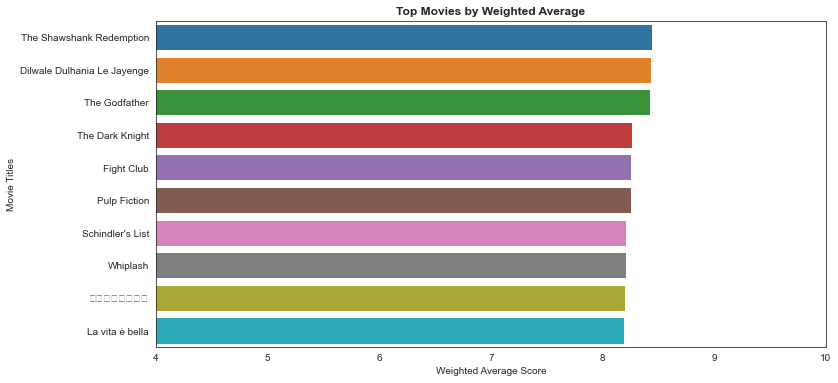

In [45]:
plt.figure(figsize=(12,6))
_=sns.barplot(x=sorted_ranked_movies['weighted_average'].head(10), y=sorted_ranked_movies['original_title'].head(10), data=sorted_ranked_movies)
_=plt.xlim(4,10)
_=plt.title('Top Movies by Weighted Average', weight='bold')
_=plt.xlabel('Weighted Average Score')
_=plt.ylabel('Movie Titles')

When pinpointing on vote average, vote count, and weighted average, films such as 'The Shawshank Redemption', 'Dilwale Dulhania Le Jayenge' (Indian film), and 'The Godfather' are the best films. 

**Now, focusing on popularity score**

In [46]:
popularity=sorted_ranked_movies.sort_values('popularity', ascending=False)

In [47]:
popularity.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,keywords,details,weighted_average
536,FALSE,28000000,"[Science Fiction, Drama, Thriller]",78,tt0083658,en,Blade Runner,In the smog-choked dystopian Los Angeles of 20...,96.272374,"[{'name': 'Shaw Brothers', 'id': 5798}, {'name...",...,"[English, Deutsch, 广州话 / 廣州話, 日本語, Magyar]",Released,Man has made his match... now it's his problem.,7.9,3833.0,"[Harrison Ford, Rutger Hauer, Sean Young, Edwa...","[Brian Tufano, Ridley Scott, Michael Deeley, P...","[artificial intelligence, bounty hunter, dysto...",In the smog-choked dystopian Los Angeles of 20...,7.810521
3504,FALSE,127500000,"[Animation, Family]",10567,tt0130623,en,Dinosaur,An orphaned dinosaur raised by lemurs joins an...,9.998415,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,[English],Released,You have never seen anything like this.,6.2,563.0,"[D. B. Sweeney, Alfre Woodard, Ossie Davis, Ma...","[Ralph Zondag, Eric Leighton, Pam Marsden, Bak...","[cataclysm, asteroid, leader, comet, animation...",An orphaned dinosaur raised by lemurs joins an...,6.072419
10556,FALSE,72000000,"[Drama, War]",25,tt0418763,en,Jarhead,Jarhead is a film about a US Marine Anthony Sw...,9.997032,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,"[English, Español, العربية, Latin]",Released,Welcome to the suck.,6.6,776.0,"[Jamie Foxx, Jake Gyllenhaal, Scott MacDonald,...","[Thomas Newman, Sam Mendes, Sam Mendes, Bobby ...","[sniper, marine corps, saudi arabia, petrol, g...",Jarhead is a film about a US Marine Anthony Sw...,6.434623
11294,FALSE,20000000,"[Comedy, Drama, Romance]",7511,tt0434139,en,The Last Kiss,Revolves around a young couple and their frien...,9.996541,"[{'name': 'Lakeshore Entertainment', 'id': 126...",...,[English],Released,We all make choices. What's yours?,5.9,125.0,"[Zach Braff, Jacinda Barrett, Casey Affleck, R...","[Paul Haggis, Tom Rosenberg, Tom Stern, Tony G...","[sex, architect, striptease, deceived wife, st...",Revolves around a young couple and their frien...,5.740103
18103,FALSE,50000000,"[Drama, Thriller, Mystery]",69668,tt1462041,en,Dream House,"Publisher, Will Atenton quits a lucrative job ...",9.995617,"[{'name': 'Cliffjack Motion Pictures', 'id': 8...",...,[English],Released,"Once upon a time, there were two little girls ...",5.8,401.0,"[Daniel Craig, Naomi Watts, Rachel Weisz, Mart...","[Avy Kaufman, Glen Scantlebury, John Debney, J...","[house fire, extension ladder, last day on job]","Publisher, Will Atenton quits a lucrative job ...",5.747341


In [48]:
type(popularity.popularity)

pandas.core.series.Series

In [49]:
popularity.popularity=popularity.popularity.astype(float)

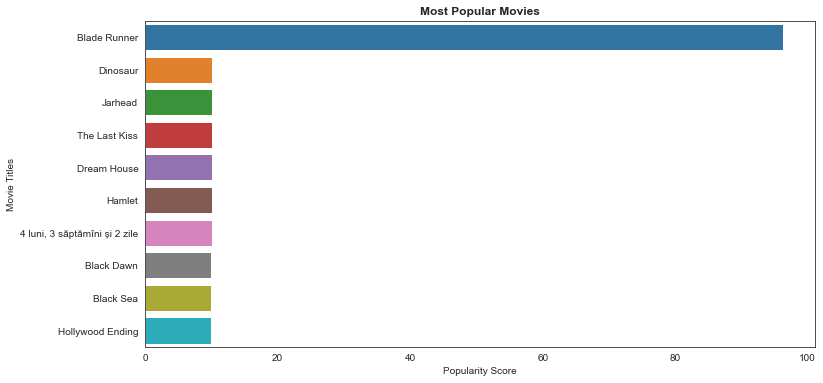

In [50]:
plt.figure(figsize=(12,6))
_=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

_=plt.title('Most Popular Movies', weight= 'bold')
_=plt.xlabel('Popularity Score')
_=plt.ylabel('Movie Titles')

Priority is given to each feature, 50% importance to popularity and weighted average. The purpose behind this implementation is because when comparing the magnitudes of weighted average and popularity, they are significantly different. Since they may have different units, scaling them may help build a basic recommender system. 

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_movies=scaler.fit_transform(movies[['weighted_average', 'popularity']])
normalized_movies = pd.DataFrame(scaled_movies, columns=['weighted_average', 'popularity'])
normalized_movies.head()

,weighted_average,popularity
0,0.834813,0.040087
1,0.666716,0.031079
2,0.486185,0.021394
3,0.436540,0.007049
4,0.428123,0.015320


In [52]:
movies[['normalized_weighted_average', 'normalized_popularity']] = normalized_movies

In [53]:
movies.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,tagline,vote_average,vote_count,cast,crew,keywords,details,weighted_average,normalized_weighted_average,normalized_popularity
0,FALSE,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...","[jealousy, toy, boy, friendship, friends, riva...","Led by Woody, Andy's toys live happily in his ...",7.641531,0.834813,0.040087
1,FALSE,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,Roll the dice and unleash the excitement!,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...","[board game, disappearance, based on children'...",When siblings Judy and Peter discover an encha...,6.821786,0.666716,0.031079
2,FALSE,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...","[fishing, best friend, duringcreditsstinger, o...",A family wedding reignites the ancient feud be...,5.941407,0.486185,0.021394
3,FALSE,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,...,Friends are the people who let you be yourself...,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...","[based on novel, interracial relationship, sin...","Cheated on, mistreated and stepped on, the wom...",5.699310,0.436540,0.007049
4,FALSE,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,Just When His World Is Back To Normal... He's ...,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...","[baby, midlife crisis, confidence, aging, daug...",Just when George Banks has recovered from his ...,5.658264,0.428123,0.015320


In [54]:
movies['scaled_score'] = movies.normalized_weighted_average*0.5 + movies.normalized_popularity * 0.5
scored_movies = movies.sort_values('scaled_score', ascending=False)
scored_movies[['original_title', 'normalized_weighted_average', 'normalized_popularity', 'scaled_score']].head(20)

,original_title,normalized_weighted_average,normalized_popularity,scaled_score
30780,Minions,0.575064,1.000000,0.787532
33439,Wonder Woman,0.734467,0.537613,0.636040
24528,Big Hero 6,0.856449,0.390602,0.623525
292,Pulp Fiction,0.960096,0.257449,0.608773
12525,The Dark Knight,0.962918,0.224968,0.593943
43252,Beauty and the Beast,0.655564,0.524675,0.590120
23745,Gone Girl,0.875969,0.282748,0.579359
26652,Guardians of the Galaxy Vol. 2,0.813613,0.338511,0.576062
44673,Baby Driver,0.721584,0.416507,0.569045
26650,Deadpool,0.780354,0.343132,0.561743


Based on scaled variables popularity and weighted average, films such as 'Minions', 'Wonder Woman', 'Big Hero 6' are the best.  

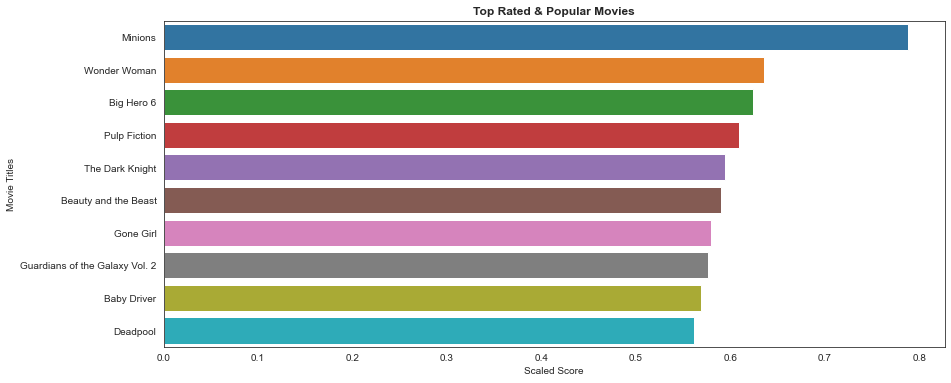

In [55]:
scored_movies = movies.sort_values('scaled_score', ascending=False)
plt.figure(figsize=(14,6))

_=sns.barplot(x=scored_movies['scaled_score'].head(10), y=scored_movies.original_title.head(10),data=scored_movies)

_=plt.title('Top Rated & Popular Movies', weight='bold')
_=plt.xlabel('Scaled Score')
_=plt.ylabel('Movie Titles')

## Simple Collaborative Filtering using Nearest Neighbor<a id='1.10_Simple_Collaborative_Filtering_using_Nearest_Neighbor'></a>

In [56]:
movie_features_matrix = ratings.pivot_table(index='original_title', columns='userId', values='rating').fillna(0)

converting pivot table into array matrix and this can be done by scipy

In [57]:
from scipy.sparse import csr_matrix

movie_features_matrix_df=csr_matrix(movie_features_matrix.values)

from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(movie_features_matrix_df)

NearestNeighbors(algorithm='brute', metric='cosine')

\begin{equation}
sim(A,B) = cos(\theta) = \frac{A * B}{||A||B||}
\end{equation}

In [58]:
movie_features_matrix.head()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,27038.0,27039.0,27040.0,27041.0,27042.0,27043.0,27044.0,27045.0,27046.0,27047.0
original_title,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$5 a Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Gator Bait,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'R Xmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Twas the Night Before Christmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using cosine similarity and euclidean distance, calculating neighbors (movies that are similar) of observed films.  
the index being printed is the index of the selected film.

In [59]:
rand_index=np.random.choice(movie_features_matrix.shape[0])
print(rand_index)
dist,indices=knn_model.kneighbors(movie_features_matrix.iloc[rand_index, :].values.reshape(1,-1), n_neighbors=6)

4206


.index + .flatten helps print out specific movie titles and neighbors is set to 6 to print out the top 5 closest films, because the first is the film itself.  
the selected film, its suggestions, and distances are calculated below.

In [60]:
for i in range(0,len(dist.flatten())):
    if i ==0:
        print('Recommendations for {0}:\n'.format(movie_features_matrix.index[rand_index]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, movie_features_matrix.index[indices.flatten()[i]], dist.flatten()[i]))

Recommendations for The Clique:

1: The Patent Leather Kid, with distance of 0.517332161938781
2: The Young Visiters, with distance of 0.5624413902360499
3: Pane, amore e gelosia, with distance of 0.5863129173229227
4: 3 días (Before the Fall), with distance of 0.595752827453297
5: City of Ghosts, with distance of 0.596883963228733


This is a basic recommender system using cosine similarity and KNearest Neighbors with the help of collabortive filerting technique.

## Matrix Factorization Model<a id='1.11_Matrix_Factorization_Model'></a>

In [61]:
from surprise import Dataset, Reader, SVD, accuracy 
from surprise.model_selection import train_test_split

In [62]:
ratings_df = ratings.groupby('userId').filter(lambda x: len(x) >= 55)
movie_list_rating = ratings_df.imdb_id.unique().tolist()

movies = movies[movies.imdb_id.isin(movie_list_rating)]

map_items = dict(zip(movies.original_title.tolist(), movies.imdb_id.tolist()))

In [63]:
# initializes a reader and reads the data
reader = Reader(rating_scale=(1,10))
data = Dataset.load_from_df(ratings_df[['userId', 'imdb_id', 'rating']], reader)

#training 
train_set, test_set = train_test_split(data, test_size = 0.25)
algorithm = SVD()
algorithm.fit(train_set)
predictions = algorithm.test(test_set)

# RMSE 
accuracy.rmse(predictions)

RMSE: 1.6964


1.6963838620034164

In [64]:
def user_predicted_rating(useri):
    if useri in ratings.userId.unique():
        useri_list = ratings[ratings.userId == useri].imdb_id.tolist()
        d = {k: v for k,v in map_items.items() if not v in useri_list}
        predictedL = []
        for i, j in d.items():
            predicted = algorithm.predict(useri, j)
            predictedL.append((i, predicted[3]))
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending = False, inplace =True)
        pdf.set_index('movies', inplace=True)
        return pdf.head(10)
    else:
        print('User ID does not exist')
        return None
            

In [67]:
user_Id =1560
user_predicted_rating(user_Id)

,ratings
movies,
The Million Dollar Hotel,8.626906
Five Dances,8.529078
I Spy Returns,8.408468
Once Were Warriors,8.402814
Taxi,8.398521
Sleepless in Seattle,8.372036
"The World, the Flesh and the Devil",8.365361
The 39 Steps,8.344355
The Return of the King,8.325335


In [68]:
def get_num_ratings(uid):
    try:
        return len(train_set.ur[train_set.to_inner_uid(uid)])
    except ValueError:
        return 0 
    
def get_num_users(iid):
    try:
        return len(train_set.ir[train_set.to_inner_iid(iid)])
    except ValueError:
        return 0 
    
predictions_df = pd.DataFrame(predictions, columns = ['uid', 'iid', 'actualRating', 'Estimation', 'Details'])
predictions_df['#_items_rated_user'] = predictions_df.uid.apply(get_num_ratings)
predictions_df['#_users_rated_item'] = predictions_df.iid.apply(get_num_users)
predictions_df['err'] = abs(predictions_df.Estimation - predictions_df.actualRating)

In [69]:
predictions_df.head()

,uid,iid,actualRating,Estimation,Details,#_items_rated_user,#_users_rated_item,err
0,11773.0,tt0110950,9.0,8.787455,{'was_impossible': False},44,364,0.212545
1,3956.0,tt0762121,8.0,6.475462,{'was_impossible': False},77,197,1.524538
2,2519.0,tt0315327,6.0,6.166367,{'was_impossible': False},55,16,0.166367
3,11693.0,tt0024703,6.0,7.612589,{'was_impossible': False},67,2022,1.612589
4,3177.0,tt0107943,8.0,8.655946,{'was_impossible': False},115,435,0.655946


### worst predictions

In [70]:
predictions_df.sort_values(by = 'err',ascending=False).head(10)

,uid,iid,actualRating,Estimation,Details,#_items_rated_user,#_users_rated_item,err
88321,16914.0,tt0405159,1.0,10.000000,{'was_impossible': False},46,946,9.000000
72217,10719.0,tt0120912,1.0,10.000000,{'was_impossible': False},79,2311,9.000000
31029,12135.0,tt0060371,1.0,10.000000,{'was_impossible': False},140,1320,9.000000
10303,10293.0,tt0961108,1.0,10.000000,{'was_impossible': False},99,10,9.000000
22041,23783.0,tt0419279,1.0,9.866184,{'was_impossible': False},139,976,8.866184
149902,6678.0,tt0240913,1.0,9.849015,{'was_impossible': False},41,1391,8.849015
57354,19810.0,tt0361596,10.0,1.248797,{'was_impossible': False},564,915,8.751203
52371,24775.0,tt0108160,1.0,9.708140,{'was_impossible': False},40,2166,8.708140
44036,5620.0,tt0163187,1.0,9.628097,{'was_impossible': False},769,13,8.628097
105046,5620.0,tt1331307,1.0,9.609275,{'was_impossible': False},769,19,8.609275


### best predictions

In [71]:
predictions_df.sort_values(by = 'err',ascending=True).head(10)

,uid,iid,actualRating,Estimation,Details,#_items_rated_user,#_users_rated_item,err
80871,18711.0,tt0044706,10.0,10.0,{'was_impossible': False},65,1329,0.0
178163,8101.0,tt0112817,10.0,10.0,{'was_impossible': False},85,401,0.0
178176,13128.0,tt0472126,10.0,10.0,{'was_impossible': False},199,1110,0.0
38275,3030.0,tt0363547,10.0,10.0,{'was_impossible': False},87,1654,0.0
38278,25219.0,tt0048347,10.0,10.0,{'was_impossible': False},298,1941,0.0
126456,4156.0,tt0077402,10.0,10.0,{'was_impossible': False},120,1096,0.0
126430,22307.0,tt0069293,10.0,10.0,{'was_impossible': False},109,3003,0.0
126405,16379.0,tt0351283,10.0,10.0,{'was_impossible': False},306,954,0.0
178291,13795.0,tt0110729,10.0,10.0,{'was_impossible': False},120,2463,0.0
38311,10050.0,tt0411061,1.0,1.0,{'was_impossible': False},207,688,0.0


In [72]:
ratings.loc[ratings['imdb_id'] == 'tt0384814']['rating'].describe()

count    1013.000000
mean        7.231984
std         2.021252
min         1.000000
25%         6.000000
50%         8.000000
75%         8.000000
max        10.000000
Name: rating, dtype: float64

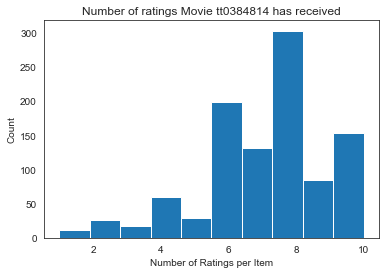

In [73]:
tmp = ratings.loc[ratings['imdb_id'] == 'tt0384814']['rating']

_=plt.hist(x = tmp.values, bins=10)
_=plt.title('Number of ratings Movie tt0384814 has received')
_=plt.xlabel('Number of Ratings per Item')
_=plt.ylabel('Count')
plt.show()

Most of the ratings for this movie falls in the range of 6-8, and less than 25% of users rated it 6 or lower. It seems that for each prediction, there exists outliers where items have been rated very low. 

**Collaborative filertering for rating prediction**

In [74]:
# inspired from Coursera's Deploying Machine Learning Models from UCSD course hw#1
# these similarity based recommenders can be used as a stepping stone for rating prediction
from collections import defaultdict
ratingsbyuser = defaultdict(list)
ratingsbyitem = defaultdict(list)
for index, i in ratings.iterrows():
    user, item = i['userId'], i['imdb_id']
    ratingsbyuser[user].append(i)
    ratingsbyitem[item].append(i)

In [75]:
ratingMean = sum([i for i in ratings[ratings['rating'].notnull()]['rating']])/len(ratings[ratings['rating'].notnull()]['rating'])
ratingMean

7.061766767037918

In [76]:
def Jaccard(s1, s2):
    #s1 = set(s1)
    #s2 = set(s2)
    numer = len(s1+s2)
    denom = len(s1 or s2)
    return numer/denom

In [77]:
def predictRatings(user, item):
    reviews = []
    similarities =[]
    for d in ratingsbyuser[user]:
        i2 = d['imdb_id']
        if i2 == item: 
            continue
        reviews.append(d['rating'])
        similarities.append(Jaccard(ratingsbyitem[item], ratingsbyuser[i2]))
        if (sum(similarities) >0):
            weightedRatings = [(x*y) for x,y in zip(reviews, similarities)]
            return sum(weightedRatings)/sum(similarities)
        else:
            return ratingMean

In [78]:
u, i = ratings['userId'][824], ratings['imdb_id'][824]
predictRatings(u,i)

8.0

In [79]:
x, y = ratings['userId'][824], ratings['imdb_id'][824]
ratings[(ratings['userId']==x) & (ratings['imdb_id'] == y)]['rating']

824    10.0
Name: rating, dtype: float64

In [80]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences)/len(differences)

In [81]:
alwaysPredictedMean = [ratingMean for index, r in ratings.iterrows()]

In [82]:
cfPredictions = [predictRatings(d['userId'], d['imdb_id']) for index, d in ratings.iterrows()]

In [83]:
def get_real_rating(user, item):
    return ratings[(ratings['userId'] == user) & (ratings['imdb_id'] == item)]['rating']

In [84]:
#actuals = [get_real_rating(d['userId'], d['imdb_id']) for index, d in ratings.iterrows()]

In [85]:
ratings[(ratings['userId'] == 1234) & (ratings['imdb_id'] == 1234)]['rating']

Series([], Name: rating, dtype: float64)

In [86]:
labels = [d for d in ratings.rating]

In [87]:
MSE(alwaysPredictedMean,labels)

nan

In [88]:
#from scipy import spatial 
#def similarity(movieId1, movieId2):
#    a = movies[movies['imdb_id'] == movieId1]
#    b = movies[movies['imdb_id'] == movieId2]
    
#    genresA = [a['genres']]
#    genresB = [b['genres']]
    
#    genreDistance = spatial.distance.cosine(genresA, genresB)
    
#    castA = [a['cast']]
#    castB =[ b['cast']]
    
#    castDistance = spatial.distance.cosine(castA, castB)
    
#    overviewA= [a['overview']]
#    overviewB = [b['overview']]
    
#    overviewDistance = spatial.distance.cosine(overviewA, overviewB)
    
#    return genreDistance + castDistance + overviewDistance 


In [89]:
zeros = pd.concat([(movie_features_matrix == 0).astype(int).sum(axis=1), 100 * (movie_features_matrix == 0).astype(int).mean(axis=1)], axis=1)
zeros.columns=['count', '% of 0s']
zeros.sort_values(by='% of 0s', ascending = False)

,count,% of 0s
original_title,,
Day Is Done,26542,99.996233
The Look of Love,26542,99.996233
Flat Top,26542,99.996233
Buried Treasure,26542,99.996233
One Girl's Confession,26542,99.996233
...,...,...
Monsoon Wedding,19022,71.664846
The 39 Steps,18796,70.813397
Солярис,18092,68.161097


In [90]:
movie_features_matrix.shape

(5717, 26543)

In [91]:
#import operator
#def predict_score():
#    name = input('Enter name of film: ')
#    movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
#    print("Selected Movie: ", movie.original_title.values[0])
#    def getNeighbors(baseMovie, K):
#        distances= []
        
#        for index, movie in movies.iterrows():
#            if movie['imdb_id'] != baseMovie['imdb_id'].values[0]:
#                dist= similarity(baseMovie['imdb_id'].values[0], movie['imdb_id'])
#                distances.append((movie['imdb_id'], dist))
               
#        distances.sort(key = operator.itemgetter(i))
#        neighbors = []
        
#        for x in range(K):
#            neighbors.append(distances[x])
#        return neighbors
    
#    K=10
#    avgRating = 0
#    neighbors = getNeighbors(movie, K)
#    print ('\n Recommended Movies: \ng')
#    for neighbor in neighbors:
#        avgRating=avgRating+movies.iloc[neighbor[0]][1]
#        print(movies.iloc[neighbor[0]][0] + ' | Genres: ' + str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ', '')+" | Rating: " +str(movies.iloc[neighbor[0]][2]))

#    print('\n')
#    avgRating = avgRating/K
#    print('The predicted rating for %s is: %f' %(movie['original_title'].values[0],avgRating))
#    print('The actual rating for %s is %f' %(movie['original_title'].values[0],movie['vote_average']))

In [92]:
#predict_score()

In [93]:
!pip freeze > requirements.txt